<a href="https://colab.research.google.com/github/dsrojo10/PDS_UdeA/blob/main/Clase5_16_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clase #5 16-Feb-23
### David Santiago Rojo C.

## Ejemplos monitor:

### Ejemplo 1. Linealidad e Invarianza Temporal

<ipython-input-1-47886e07e8ee>:27: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(t, y)


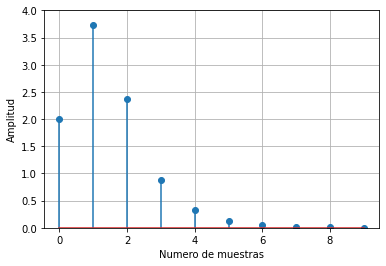

In [ ]:
# Importar las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt

def desplazar_nper(secuencia, desplazamiento):
    # Toma el desplazamiento, y, mientras el contador sea menor a ese contadorvan a haber ceros,
    # luego de eso, se usa el mismo desplazamiento para agarrar los valores que se omitieron por la
    # sentencia IF.
    secuencia_despl = []
    for i in range(len(secuencia)):
        if (i < desplazamiento):
            secuencia_despl.append(0)
        else:
            secuencia_despl.append(secuencia[i-desplazamiento])
    return secuencia_despl

t = np.arange(0, 10)
x = lambda k: np.exp(-k) # Prototipo de la función a la que se le aplican las transformaciones
x1 = 2*x(t)
x2 = desplazar_nper(3*x(t), 1)
x3 = desplazar_nper(x(t), 2)

y = x1+x2+x3

# Grafica de la señal de salida y
plt.figure()
plt.stem(t, y)
plt.xlabel('Numero de muestras')
plt.ylabel('Amplitud')
plt.ylim([0, 4])
plt.grid()
plt.show()

### Ejemplo 2. Convolución de Señales.

In [ ]:
# Importar las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt

$x(n)=[\vec{4},3,2]$\
$h(n)=[10,\vec{20},10]$

<ipython-input-3-2394fe74e88f>:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(n, y)


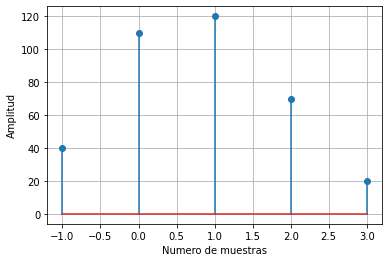

In [ ]:
# Sabiendo que h(n) tiene el cero en el 20 y x(n) lo tiene en el primer elemento:
# N1=0 y N2=-1. M1=2, M2=1. N1+N2 <= n <= M1+M2
# El rango debe ser desde [-1,3]
n = np.arange(-1,4)
h = np.array([10, 20, 10])  # h(n)
x = np.array([4, 3, 2])     # x(n)
y = np.convolve(h, x)       # Convolución de las señales y(n)
# Grafica de la convolución
plt.figure()
plt.stem(n, y)
plt.xlabel('Numero de muestras')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

Otro ejemplo de convolución:

$j(n)=[\vec{-2},0,1,-1,3]$\
$h(n)=[\vec{1},2,0,-1]$

<ipython-input-4-a3548e084cf3>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(n2, z)


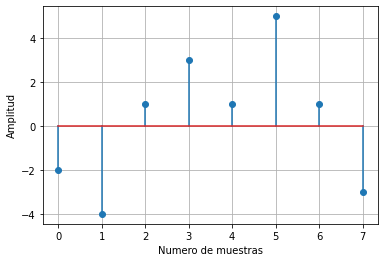

In [ ]:
# En este caso los ceros de ambos arreglos están en el primer elemento
# entonces se sabe que N1=N2=0 y M1=4, M2=3
# El rango es entonces: 0 <= n <= 7
n2 =np.arange(0, 8)
j = np.array([-2, 0, 1, -1, 3])
k = np.array([1, 2, 0, -1])
z = np.convolve(j, k)

# Grafica de la convolución
plt.figure()
plt.stem(n2, z)
plt.xlabel('Numero de muestras')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

## Ejemplos mios:

### Ej1: Convolución de Señales Sinoaidales:

<ipython-input-4-ca6a061ac130>:22: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(n1, s1)
<ipython-input-4-ca6a061ac130>:28: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(n2, s2)
<ipython-input-4-ca6a061ac130>:36: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_c

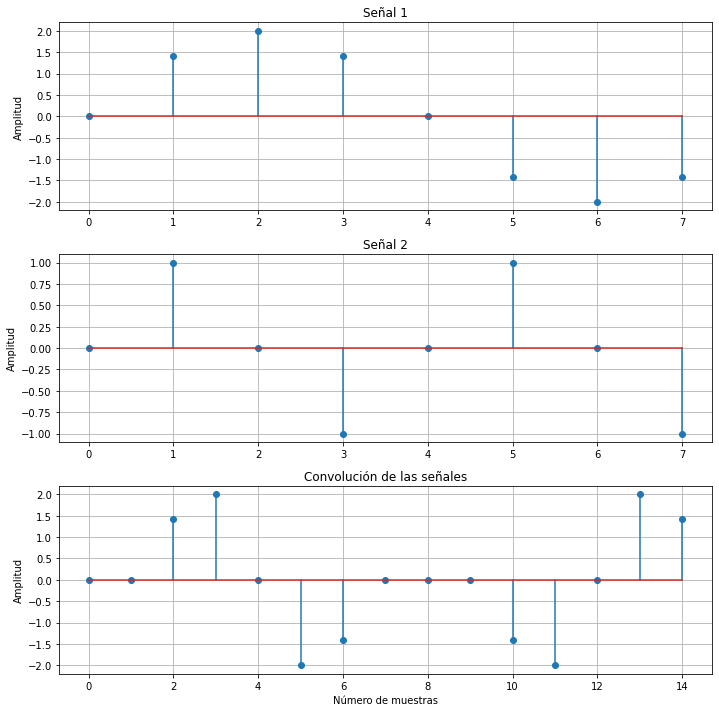

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Señal 1
A1 = 2
f1 = 1/8
n1 = np.arange(0, 8)
s1 = A1 * np.sin(2 * np.pi * f1 * n1)

# Señal 2
A2 = 1
f2 = 1/4
n2 = np.arange(0, 8)
s2 = A2 * np.sin(2 * np.pi * f2 * n2)

# Realizamos la convolución
z = np.convolve(s1, s2)

# Graficamos las señales originales
plt.figure(figsize=(10, 10))
plt.subplot(311)
plt.stem(n1, s1)
plt.ylabel('Amplitud')
plt.title('Señal 1')
plt.grid()

plt.subplot(312)
plt.stem(n2, s2)
plt.ylabel('Amplitud')
plt.title('Señal 2')
plt.grid()

# Graficamos la convolución
n = np.arange(0, len(z))
plt.subplot(313)
plt.stem(n, z)
plt.xlabel('Número de muestras')
plt.ylabel('Amplitud')
plt.title('Convolución de las señales')
plt.grid()

plt.tight_layout()
plt.show()

* En la gráfica resultante se puede ver que la convolución de las dos señales senoidales produce una señal con una forma compleja, que no se parece a ninguna de las señales de entrada. Esta es una característica común de la convolución: a menudo se utilizan para combinar señales y extraer información de una señal a través de otra. En este caso, la convolución nos da información sobre la relación entre las dos señales senoidales.

* Con las señales senoidales utilizadas, la convolución nos muestra cómo las dos señales se superponen y combinan a medida que una de ellas se desplaza en el tiempo. En la gráfica de la convolución, se puede observar que hay varios puntos en los que la suma de las muestras de las dos señales de entrada es máxima, y otros en los que es mínima. La posición y amplitud de estos picos y valles nos da información sobre la frecuencia y fase relativa de las dos señales senoidales. Por ejemplo, se puede inferir que las dos señales senoidales tienen diferentes frecuencias y fases, debido a la complejidad de la forma de onda resultante de la convolución.